In [1]:
import numpy as np

with open('/data/examples/may_the_4_be_with_u/where_am_i/mapping.txt') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip(' \t\n\r').split(', ') for x in content] 
aList = np.array(content)
print(content)
yMap = dict(zip(aList[:,0], aList[:,1]))
print(yMap['CALsuburb'])



[['CALsuburb', '9'], ['PARoffice', '7'], ['bedroom', '12'], ['coast', '10'], ['forest', '4'], ['highway', '14'], ['industrial', '2'], ['insidecity', '3'], ['kitchen', '0'], ['livingroom', '5'], ['mountain', '8'], ['opencountry', '6'], ['store', '11'], ['street', '1'], ['tallbuilding', '13']]
9


In [2]:
import os
import pandas as pd

trainList = []
for dirname, dirnames, filenames in os.walk('/data/examples/may_the_4_be_with_u/where_am_i/train'):
    # print path to all subdirectories first.
    #for subdirname in dirnames:
     #   print(os.path.join(dirname, subdirname))
    
    # print path to all filenames.
    for filename in filenames:
        folderName = dirname.replace('/data/examples/may_the_4_be_with_u/where_am_i/train/','')
        #print(folderName, filename)
        row = []
        row.append(yMap[folderName])
        row.append(folderName)
        row.append(filename)
        row.append(os.path.join(dirname, filename))
        trainList.append(row)
        
trainDf = pd.DataFrame(trainList, columns=['label','folder','file','path'])        
  
print(trainDf.shape)

(2985, 4)


In [3]:
trainDf.head()

label     folder            file  \
0     9  CALsuburb  image_0001.jpg   
1     9  CALsuburb  image_0002.jpg   
2     9  CALsuburb  image_0003.jpg   
3     9  CALsuburb  image_0004.jpg   
4     9  CALsuburb  image_0005.jpg   

                                                path  
0  /data/examples/may_the_4_be_with_u/where_am_i/...  
1  /data/examples/may_the_4_be_with_u/where_am_i/...  
2  /data/examples/may_the_4_be_with_u/where_am_i/...  
3  /data/examples/may_the_4_be_with_u/where_am_i/...  
4  /data/examples/may_the_4_be_with_u/where_am_i/...

In [4]:
trainDf.path[0]

'/data/examples/may_the_4_be_with_u/where_am_i/train/CALsuburb/image_0001.jpg'

img.shape (220, 330, 3) (330, 3)
color: [48 48 48]
(217800,)


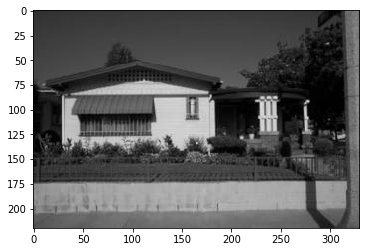

In [5]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

img = cv2.imread(trainDf['path'][0]) #  RGB 降維
plt.imshow(img) #, cmap='gray'
print('img.shape',img.shape, img[0].shape)
print('color:',img[0][0])
print(img.flatten().shape)

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
resize = (32, 32)

X = np.array([cv2.resize(cv2.imread(t), resize) for t in trainDf['path']])



In [7]:
print(X.shape)

(2985, 32, 32, 3)


In [8]:

x_train, x_test, y_train, y_test = train_test_split(
    X, trainDf['label'], test_size=0.33, random_state=42)

print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(1999, 32, 32, 3) (1999,) (986, 32, 32, 3) (986,)


In [9]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import os


save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
print(save_dir)
# The data, shuffled and split between train and test sets:
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0])


Using TensorFlow backend.


/home/jovyan/murphy/where_am_i/saved_models
x_train shape: (1999, 32, 32, 3)
1999 train samples
986 test samples
[[[ 86  86  86]
  [ 82  82  82]
  [ 80  80  80]
  ..., 
  [241 241 241]
  [243 243 243]
  [244 244 244]]

 [[ 84  84  84]
  [ 82  82  82]
  [ 82  82  82]
  ..., 
  [249 249 249]
  [250 250 250]
  [251 251 251]]

 [[ 83  83  83]
  [ 86  86  86]
  [ 83  83  83]
  ..., 
  [ 55  55  55]
  [163 163 163]
  [253 253 253]]

 ..., 
 [[ 82  82  82]
  [ 82  82  82]
  [ 79  79  79]
  ..., 
  [  9   9   9]
  [ 20  20  20]
  [  7   7   7]]

 [[ 75  75  75]
  [ 76  76  76]
  [ 73  73  73]
  ..., 
  [  6   6   6]
  [  9   9   9]
  [ 23  23  23]]

 [[ 68  68  68]
  [ 70  70  70]
  [ 68  68  68]
  ..., 
  [  5   5   5]
  [ 20  20  20]
  [ 16  16  16]]]


In [10]:
num_classes = 15
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape, y_test.shape)

(1999, 15) (986, 15)


In [11]:

# build our CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3),
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        73792     
__________

In [12]:

# initiate Adam optimizer
opt = keras.optimizers.Adam()

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.



In [13]:
batch_size = 128
epochs = 50

print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Use ModelCheckpoint to save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)

# earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Fit the model on the batches generated by datagen.flow().
model_history = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4,
                    callbacks=[earlystop, checkpoint])

# loading our save model
print("Loading trained model")
model = load_model(model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/50
15/16 [===========================>..] - ETA: 0s - loss: 2.6889 - acc: 0.0887
Epoch 00001: val_loss improved from inf to 2.66064, saving model to /home/jovyan/murphy/where_am_i/saved_models/keras_cifar10_trained_model.h5
16/16 [==============================] - 3s 166ms/step - loss: 2.6878 - acc: 0.0920 - val_loss: 2.6606 - val_acc: 0.1024
Epoch 2/50
15/16 [===========================>..] - ETA: 0s - loss: 2.6224 - acc: 0.1308
Epoch 00002: val_loss improved from 2.66064 to 2.49232, saving model to /home/jovyan/murphy/where_am_i/saved_models/keras_cifar10_trained_model.h5
16/16 [==============================] - 1s 67ms/step - loss: 2.6183 - acc: 0.1329 - val_loss: 2.4923 - val_acc: 0.1917
Epoch 3/50
14/16 [=========================>....] - ETA: 0s - loss: 2.4850 - acc: 0.1693
Epoch 00003: val_loss improved from 2.49232 to 2.31304, saving model to /home/jovyan/murphy/where_am_i/saved_models/keras_cifar10_trained_model.h5
16/16 [=============

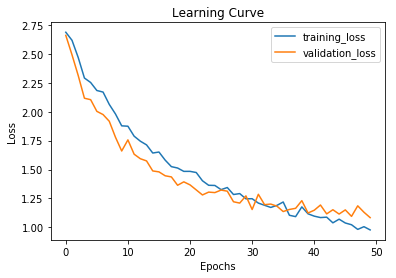

In [14]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [15]:
import os
import pandas as pd

testList = []
for dirname, dirnames, filenames in os.walk('/data/examples/may_the_4_be_with_u/where_am_i/testset'):
    # print path to all subdirectories first.
    #for subdirname in dirnames:
     #   print(os.path.join(dirname, subdirname))
    
    # print path to all filenames.
    for filename in filenames:
        folderName = dirname.replace('/data/examples/may_the_4_be_with_u/where_am_i/testset/','')
        #print(folderName, filename)
        row = []
        row.append(filename.replace('.jpg',''))
        row.append(os.path.join(dirname, filename))
        testList.append(row)
        
testDf = pd.DataFrame(testList, columns=['id','path'])        
  
print(testDf.shape, testDf.iloc[0,0], testDf.iloc[0,1])

(1500, 2) 001d4c8d70ebf7f025fccf256324d3d5ad3560faee1cdf8c7115f5eb033bc3d2 /data/examples/may_the_4_be_with_u/where_am_i/testset/001d4c8d70ebf7f025fccf256324d3d5ad3560faee1cdf8c7115f5eb033bc3d2.jpg


In [16]:
testDf.head()

id  \
0  001d4c8d70ebf7f025fccf256324d3d5ad3560faee1cdf...   
1  00317b9d4bed4a2b1017e2bd31b9bf2f25bad05a65f570...   
2  003d15d71c1514af5bb8734a96bae2c4d1ce299da8d369...   
3  013c78d920be5390dbc66ca238ae3f49a2b0cf13e36013...   
4  0175d5cda7ae5f6767187eef4bc29e0be62a5506acfdcf...   

                                                path  
0  /data/examples/may_the_4_be_with_u/where_am_i/...  
1  /data/examples/may_the_4_be_with_u/where_am_i/...  
2  /data/examples/may_the_4_be_with_u/where_am_i/...  
3  /data/examples/may_the_4_be_with_u/where_am_i/...  
4  /data/examples/may_the_4_be_with_u/where_am_i/...

In [17]:
imgTest = np.array([cv2.resize(cv2.imread(t), resize) for t in testDf['path']])
imgTest = imgTest.astype('float32')
imgTest /= 255.
y_pred=model.predict_classes(imgTest)

print(y_pred.shape)

(1500,)


In [18]:


out = pd.DataFrame()
out['id'] = testDf['id']
out['class'] = y_pred
print(out.shape)
out.to_csv('submit.csv',index=False)

(1500, 2)
